<center><h1>Jaini Bhavsar</h1></center><hr>

<h1> Bank Marketing Data Set </h1>

<img src="bank.png" height="150">

<h2> Content </h2>


* Data Information
* Importing necessary modules
* Data Fetching
* Data Preprocessing
* Feature Engineering
* Data Balancing
* Handling Outliers
* Modeling the ML Algorithms
* Evaluating the performance
* Conclusion

## Data Information

Input variables:
<p>
<b> bank client data: </b>
    
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    
5 - default: has credit in default? (categorical: 'no','yes','unknown')
    
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
<b> related with the last contact of the current campaign: </b>
    
8 - contact: contact communication type (categorical: 'cellular','telephone')
    
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
11 - duration: last contact duration, in seconds (numeric)
    
<b> other attributes: </b>
    
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
14 - previous: number of contacts performed before this campaign and for this client (numeric)
    
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
<b> social and economic context attributes: </b>
    
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    
20 - nr.employed: number of employees - quarterly indicator (numeric)

<b> Output variable (desired target): </b>
    
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
    
</p>

## Importing Modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#data encoding, imputing, and model building and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import random

## Data Fetching

### Data fetching involves extraction of data from the CSV file which comprises of 21 columns. "y" is the output column and all other columns are input columns.

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Correlation

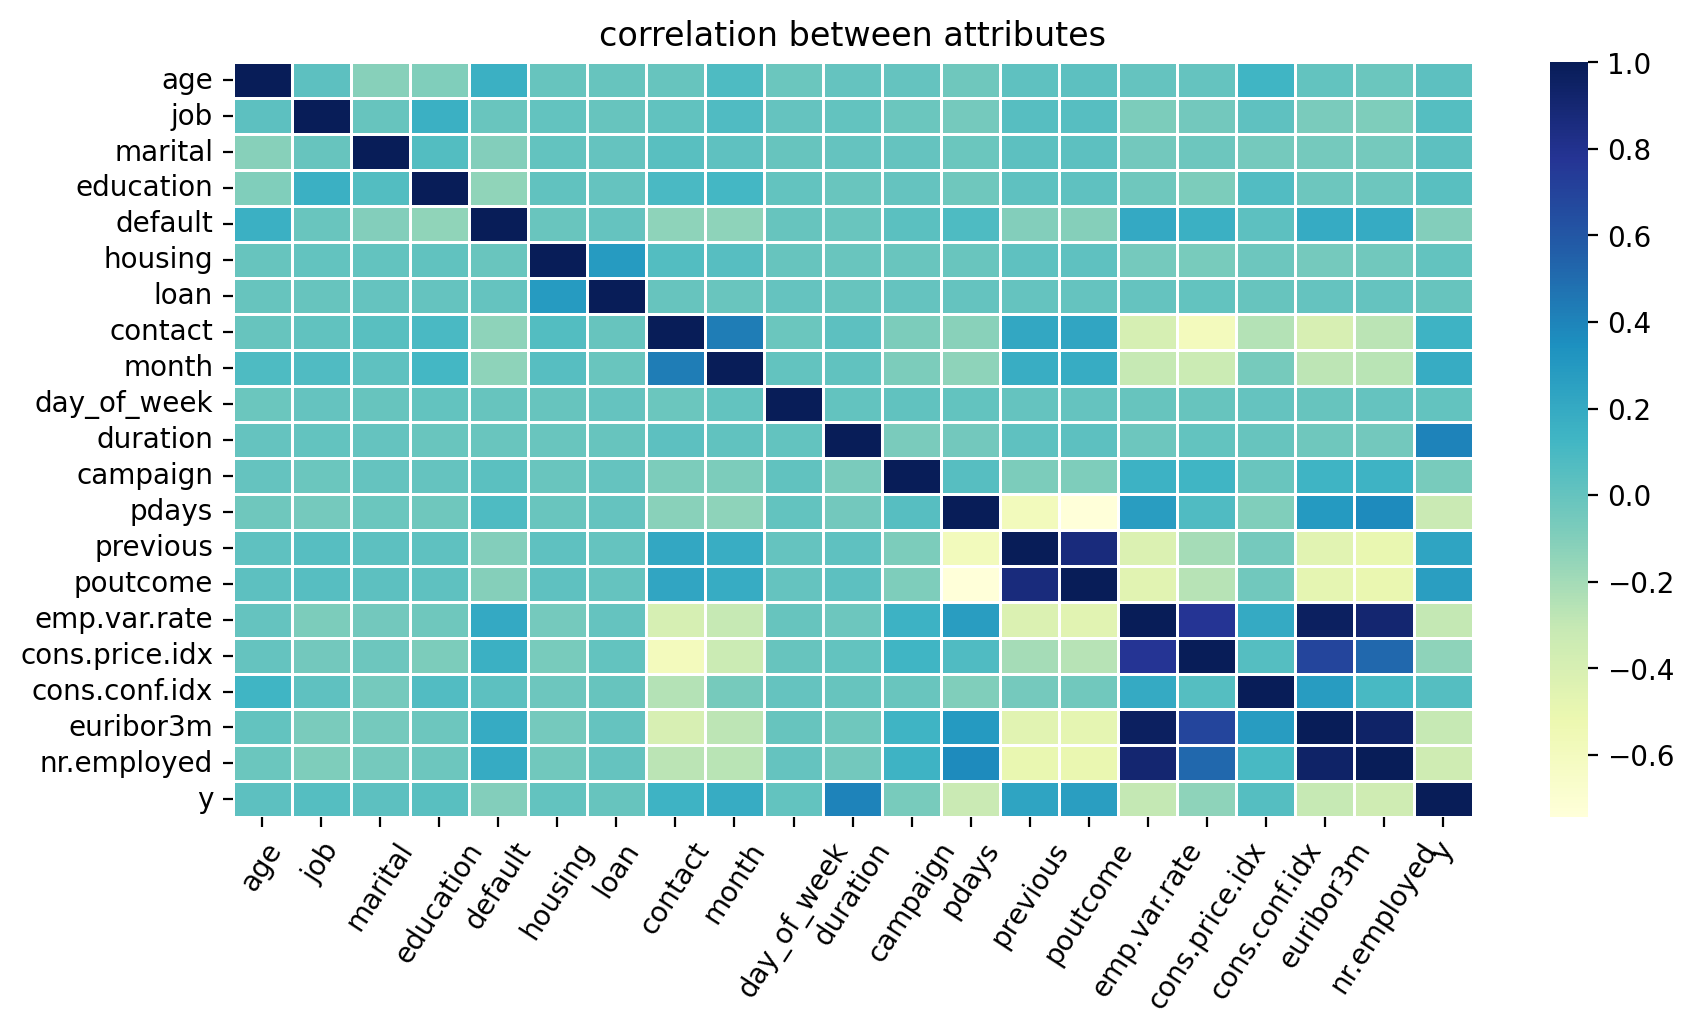

In [4]:
df2 = df.copy()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df2[i]=pd.factorize(df[i])[0]

plt.figure(figsize=(10, 5),dpi=200)
plt.title('correlation between attributes')
sns.heatmap(df2.corr(),lw=1,linecolor='white',cmap='YlGnBu')
plt.xticks(rotation=57)
plt.yticks(rotation = 0)
plt.show()
corr_matrix = df.corr()
#print(corr_matrix)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Checking for Categorical Columns

In [6]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

### Plot for Categorical Columns

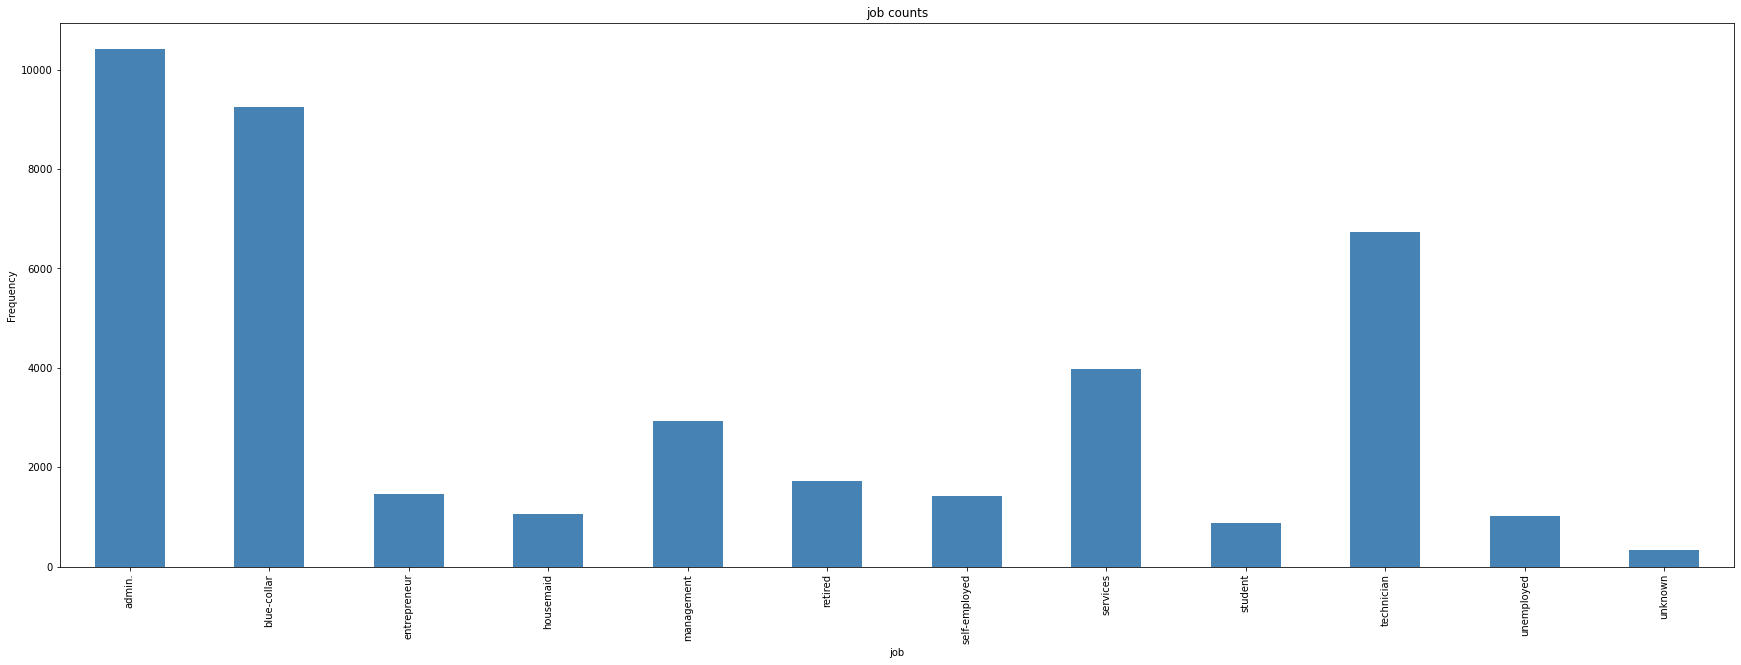

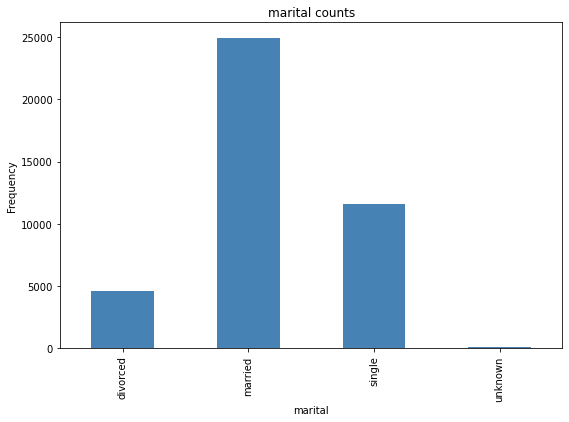

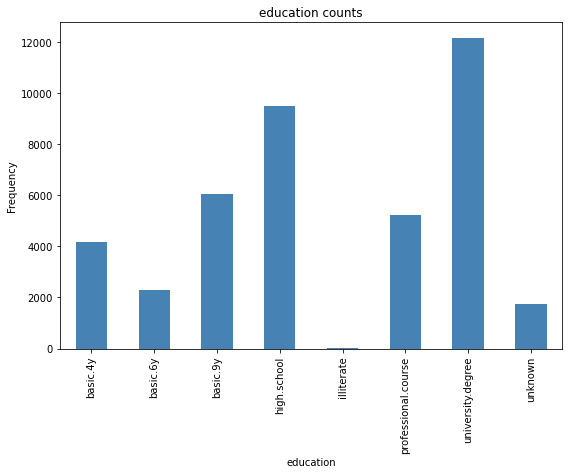

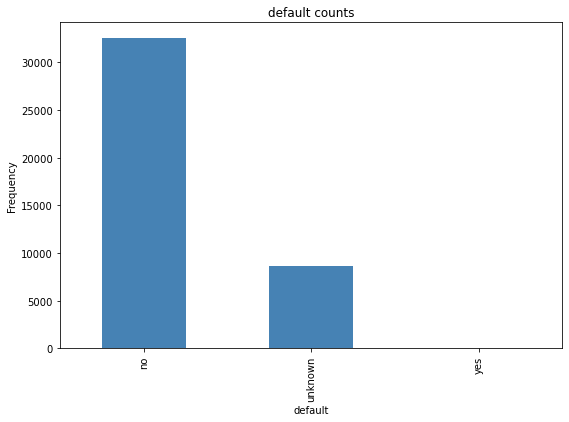

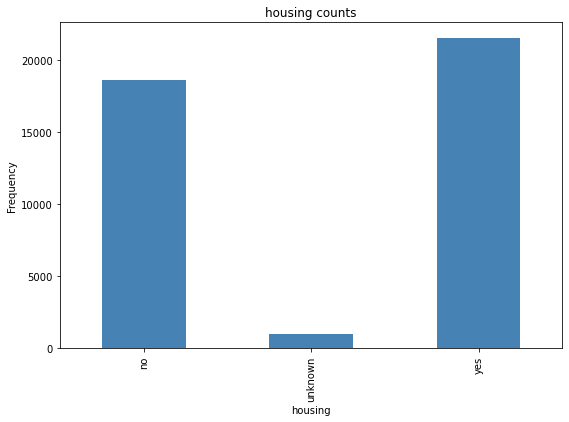

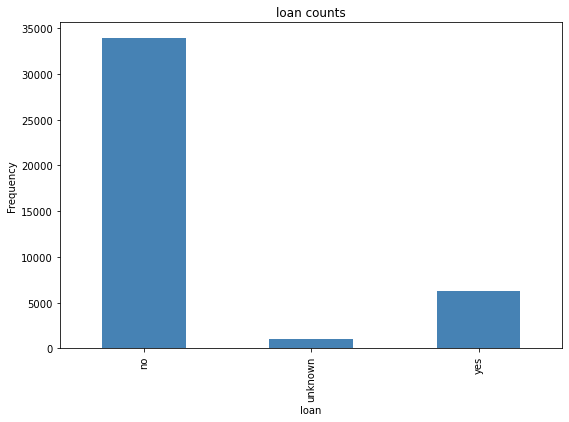

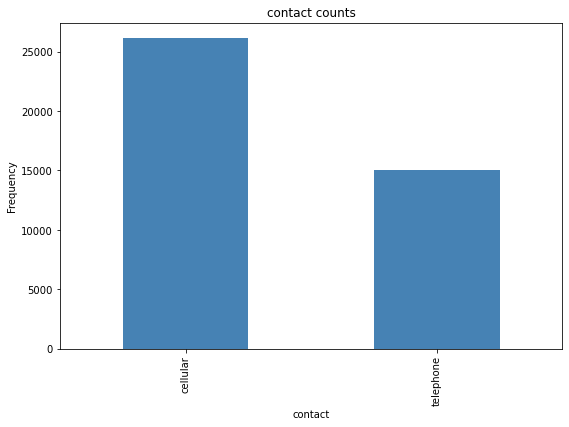

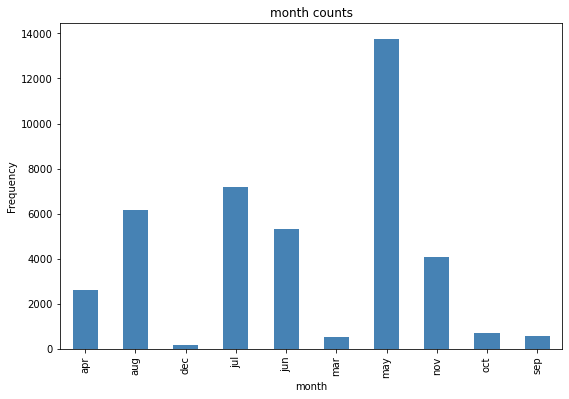

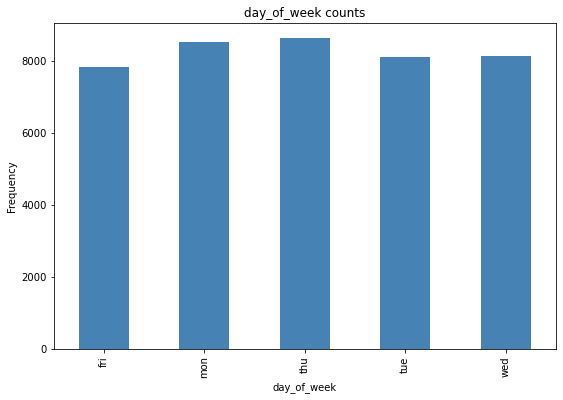

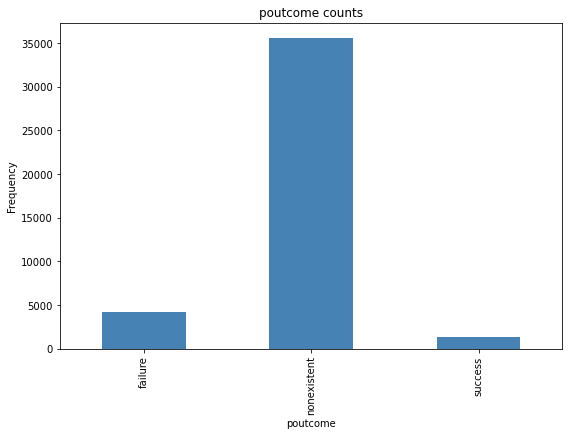

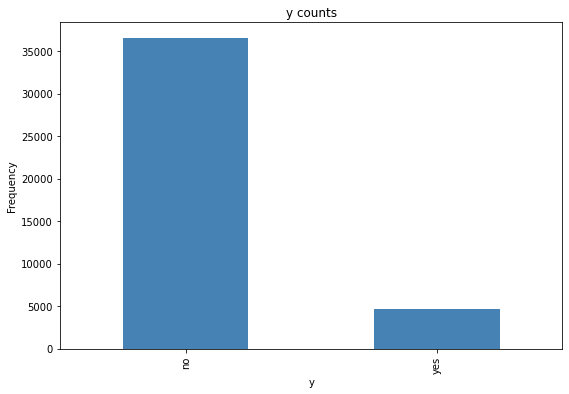

In [7]:
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

## Feature Engineering

In [8]:
import warnings
warnings.filterwarnings('ignore')
df = df.drop(["month","day_of_week","contact"],axis=1)
df["education"] = df["education"].replace(['basic.4y','high.school','basic.6y','basic.9y','professional.course','university.degree','illiterate',"unknown"],[4,12,6,9,14,17,0,np.nan])
df.housing[df['housing']=='no']=0
df.housing[df['housing']=='yes']=1
df.housing[df['housing']=='unknown']=np.nan
df.loan[df['loan']=='no']=0
df.loan[df['loan']=='yes']=1
df.loan[df['loan']=='unknown']=np.nan
df["loan"]=df["loan"]+df["housing"]
df.drop("housing",axis=1)

,age,job,marital,education,default,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,4.0,no,0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,12.0,unknown,0,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,12.0,no,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,6.0,no,0,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,12.0,no,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,14.0,no,1,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,14.0,no,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,17.0,no,1,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,14.0,no,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Dataset Balancing

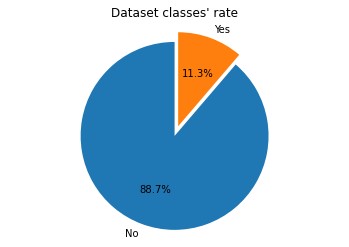

In [9]:
values=df["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]
labels=["No","Yes"]
scale=values[0]/values[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()

In [10]:
df["y"]=df["y"].replace("no",0)
df["y"]=df["y"].replace("yes",1)
df_class_majority = df[df.y==0]
df_class_minority = df[df.y==1]
# Upsample of minority class
from sklearn.utils import resample
df_class_minority_upsampled = resample(df_class_minority, 
                                           replace = True,     
                                           n_samples =df_class_majority.shape[0],   
                                           random_state = 150) 
df = pd.concat([df_class_majority, df_class_minority_upsampled])
Y = df["y"]
X = df.drop(['y'], axis=1)

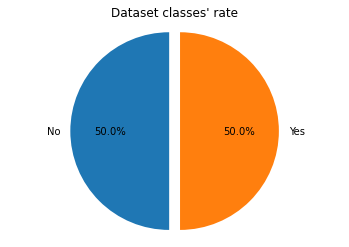

In [11]:
values=df["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]
labels=["No","Yes"]
scale=values[0]/values[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()

In [12]:
categoricals=['job','marital','default','poutcome','campaign']
labelencoder = LabelEncoder()
for c in categoricals:
    X[c] = labelencoder.fit_transform(X[c]) 
X.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,4.0,0,0,0,261,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,12.0,1,0,0,149,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,12.0,0,1,1,226,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,6.0,0,0,0,151,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,12.0,0,0,1,307,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [13]:
# Imputing Missing Values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

## Handling Outliers

### Outlier removal is a necessary step to remove data points that would inappropriately influence the model training.

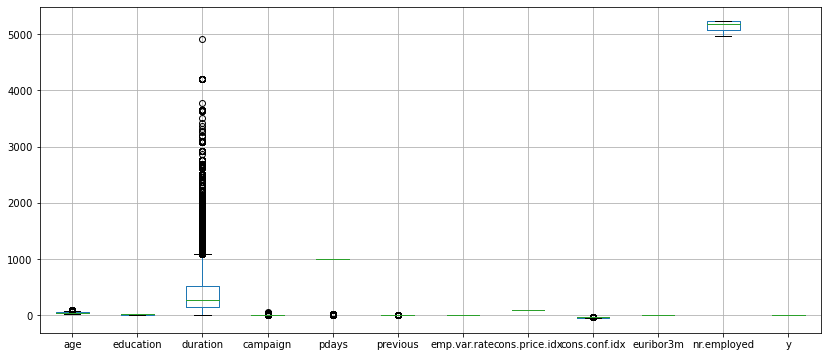

In [14]:
plt.figure(figsize=(14,6))
df.boxplot()
print()

<AxesSubplot:ylabel='cons.conf.idx'>

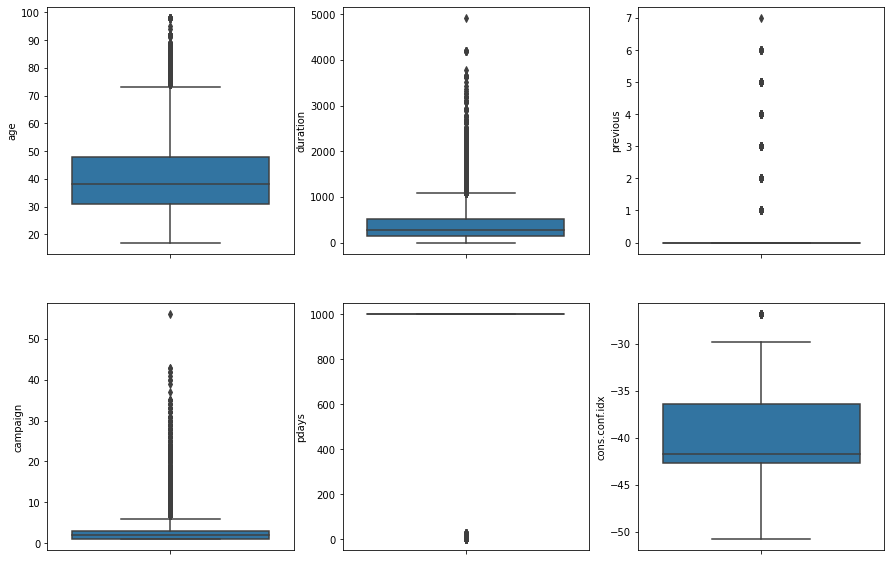

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
sns.boxplot(y=df["age"],ax=axs[0][0])
sns.boxplot(y=df["duration"],ax=axs[0][1])
sns.boxplot(y=df["previous"],ax=axs[0][2])
sns.boxplot(y=df["campaign"],ax=axs[1][0])
sns.boxplot(y=df["pdays"],ax=axs[1][1])
sns.boxplot(y=df["cons.conf.idx"],ax=axs[1][2])

In [16]:
Q1 = df['duration'].quantile(.25)
Q3 = df['duration'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['duration'] >= lower] 
df = df[df['duration'] <=upper] 

In [17]:
Q1 = df['age'].quantile(.20)
Q3 = df['age'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['age'] >= lower] 
df = df[df['age'] <=upper] 

Q1 = df['previous'].quantile(.20)
Q3 = df['previous'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['previous'] >= lower] 
df = df[df['previous'] <=upper] 

## Modeling ML Algortihms

## 1. Decision Tree

In [18]:
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [19]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()


Accuracy: 0.9640



In [20]:
!pip install prettyTable

### Cross - Validation

In [21]:
def generate_reports(cm):
        tn, fp, fn, tp = cm.ravel()
        table = PrettyTable()
        table.field_names = ["TN, FP, FN, TP", "Count"]
        table.add_row(["True Negative", tn])
        table.add_row(["False Postive", fp])
        table.add_row(["False Negative", fn])
        table.add_row(["True Postive", tp])

        print(table)
        
        sen = tp / (tp + fn)
        # print("Sensitivity : ", sen)

        spec = tn / (fp + tn)
        # print("Specificity : ", spec)

        prec = tp / (tp + fp)
        # print("Precision : ", prec)

        npv = tn / (tn + fn)
        # print("Negative Predictive Value : ", npv)

        fpr = fp / (fp + tn)
        # print("False Positive Rate : ", fpr)

        fdr = fp / (fp + tp)
        # print("False Discovery Rate : ", fdr)

        fnr = fn / (fn + tp)
        # print("False Negative Rate : ", fnr)

        acc = (tp + tn) / (tp+tn+fp+fn)
        # print("Accuracy : ", acc)

        f1score = (2 * tp) / (2*tp + fp + fn)
        # print("F1 Score : ", f1score)

        bacc = 0.5 * (sen + spec)
        # print("BACC : ", bacc)

        tss = sen - fpr
        # print("TSS : ", tss)

        hss = (2 * (tp * tn - fp * fn)) / (((tp + fn)* (fn + tn)) + (tp + fp) * (fp + tn))
        # print("HSS : ", hss)

        table = PrettyTable()
        table.field_names = ["Measure", "Value", "Derivations"]
        table.add_row(["Sensitivity", sen, "tp / (tp + fn)"])
        table.add_row(["Specificity", spec, "tn / (fp + tn)"])
        table.add_row(["Precision", prec, "tp / (tp + fp)"])
        table.add_row(["Negative Predictive Value", npv, "tn / (tn + fn)"])
        table.add_row(["False Positive Rate", fpr, "fp / (fp + tn)"])
        table.add_row(["False Discovery Rate", fdr, "fp / (fp + tp)"])
        table.add_row(["False Negative Rate", fnr, "fn / (fn + tp)"])
        table.add_row(["Accuracy", acc, "(tp + tn) / (p + n)"])
        table.add_row(["F1 Score", f1score, "(2 * tp) / (2*tp + fp + fn)"])
        table.add_row(["BACC", bacc, "0.5 * ((tp / (tp + fn)) + (tn / (fp + tn)))"])
        table.add_row(["TSS", tss, "(tp / (tp + fn)) - (fp / (fp + tn))"])
        table.add_row(["HSS", hss, "2 * (tp*tn - fp*fn) / (tp + fn)(fn + tn) + (tp + fp)(fp + tn)"])

        print(table)

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from prettytable import PrettyTable
from sklearn.utils import shuffle


def kfoldCrossValidation(clf, x_train, y_train, noOfFolds, shuffleValue):
    kfold_df_x = x_train
    kfold_df_x = kfold_df_x.reset_index(drop=True)

    kfold_df_y = y_train
    kfold_df_y = kfold_df_y.reset_index(drop=True)

    kfold_df = kfold_df_x.join(kfold_df_y)
    
    if shuffleValue==True:
        kfold_df = shuffle(kfold_df)
    
    list_df = []
    temp = 0
    for i in range(0,noOfFolds,1):
        first_slicing_value = temp;
        second_slicing_value = first_slicing_value +  (len(kfold_df) + 1) //noOfFolds
        list_df.append(kfold_df[first_slicing_value : second_slicing_value])
        temp = second_slicing_value + 1
        
    accuracy_scores = []
    for i in range(0, len(list_df)):
        print("\nIteration ",(i+1)," for K-Fold Cross Validation : ")
        print("===================================================")
        x_test_cv = list_df[i].iloc[:, :list_df[i].shape[1]-1]
        y_test_cv = list_df[i].iloc[:, list_df[i].shape[1]-1 : list_df[i].shape[1]+1]
        
#         print("x_test_cv_shape : ",x_test_cv.shape)

        x_train_cv = pd.DataFrame()
        y_train_cv = pd.DataFrame()
        for j in range(0, len(list_df)):
            if j!=i:
                x_train_cv = x_train_cv.append(list_df[j])
        
#         print("x_train_cv_shape : ",x_train_cv.shape)
        y_train_cv = x_train_cv.iloc[:, x_train_cv.shape[1]-1 : x_train_cv.shape[1]+1]
        x_train_cv = x_train_cv.iloc[:, :x_train_cv.shape[1]-1]        
        print(x_train_cv)
        
        clf.fit(x_train_cv, y_train_cv)
        y_test_cv_pred = clf.predict(x_test_cv)
        
        results = metrics.accuracy_score(y_test_cv, y_test_cv_pred)
        print("Accuracy Score : ",results)
        accuracy_scores.append(results)
        
        labels  = np.unique(np.array(y_test_cv))
        cm = confusion_matrix(np.array(y_test_cv), np.array(y_test_cv_pred), labels = labels)
        print("\n\nConfusion Matrix ==>\n")
        print(pd.DataFrame(cm, index=labels, columns=labels))
        
        generate_reports(cm)
        
#     print("\Overall results for K-Fold Cross Validation : ")
#     print("===================================================")
    print("Mean Accuracy Score : ",np.array(accuracy_scores).mean())
    return accuracy_scores

In [23]:
accuracy = kfoldCrossValidation(dtc, X_train, y_train, 10, False)


Iteration  1  for K-Fold Cross Validation : 
        age  job  marital  education  default  housing      loan  duration  \
5117   28.0  0.0      2.0       17.0      0.0      1.0  2.000000      63.0   
5118   31.0  7.0      1.0       12.0      0.0      1.0  1.000000     591.0   
5119   45.0  4.0      1.0        9.0      0.0      1.0  1.000000     363.0   
5120   31.0  6.0      1.0       17.0      0.0      1.0  1.000000     207.0   
5121   59.0  7.0      1.0       17.0      0.0      1.0  1.000000     383.0   
...     ...  ...      ...        ...      ...      ...       ...       ...   
51162  24.0  1.0      1.0        9.0      0.0      1.0  1.666667     781.0   
51163  52.0  2.0      1.0        9.0      1.0      1.0  1.000000     176.0   
51164  23.0  8.0      2.0       12.0      0.0      0.0  1.000000     409.0   
51165  48.0  7.0      1.0       12.0      1.0      1.0  1.000000     243.0   
51166  36.0  7.0      1.0       12.0      1.0      0.0  0.000000      79.0   

       campaign  

Accuracy Score :  0.9601250977326036


Confusion Matrix ==>

      0     1
0  2427   190
1    14  2485
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2427 |
| False Postive  |  190  |
| False Negative |   14  |
|  True Postive  |  2485 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9943977591036415  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9273977837218189  |                         tn / (fp + tn)                        |
|         Precision         |   0.9289719626168225  |                         tp / (tp + fp

Accuracy Score :  0.9628616106333072


Confusion Matrix ==>

      0     1
0  2347   183
1     7  2579
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2347 |
| False Postive  |  183  |
| False Negative |   7   |
|  True Postive  |  2579 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.997293116782676   |                         tp / (tp + fn)                        |
|        Specificity        |   0.9276679841897233  |                         tn / (fp + tn)                        |
|         Precision         |   0.9337436640115858  |                         tp / (tp + fp

Accuracy Score :  0.9642298670836591


Confusion Matrix ==>

      0     1
0  2356   179
1     4  2577
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2356 |
| False Postive  |  179  |
| False Negative |   4   |
|  True Postive  |  2577 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9984502130956994  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9293885601577909  |                         tn / (fp + tn)                        |
|         Precision         |   0.9350507982583455  |                         tp / (tp + fp

Accuracy Score :  0.9630570758405004


Confusion Matrix ==>

      0     1
0  2392   187
1     2  2535
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2392 |
| False Postive  |  187  |
| False Negative |   2   |
|  True Postive  |  2535 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9992116673236106  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9274912756882513  |                         tn / (fp + tn)                        |
|         Precision         |   0.9313005143277002  |                         tp / (tp + fp

In [24]:
accuracy

[0.9546520719311963,
 0.9581704456606724,
 0.9601250977326036,
 0.9612978889757623,
 0.9628616106333072,
 0.9614933541829555,
 0.9642298670836591,
 0.9612978889757623,
 0.9630570758405004,
 0.9616738365271803]

In [25]:
import statistics
statistics.mean(accuracy)

0.9608859137543599

In [26]:
labels  = np.unique(np.array(y_test))
cm = confusion_matrix(np.array(y_test), np.array(y_dtc_pred), labels = labels)
generate_reports(cm)

+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  | 10236 |
| False Postive  |  785  |
| False Negative |   4   |
|  True Postive  | 10904 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9996332966629996  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9287723437074675  |                         tn / (fp + tn)                        |
|         Precision         |   0.9328428436992043  |                         tp / (tp + fp)                        |
| Negative Predictive Value |      0.999609375      |                       

## 2. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state=0)
rforest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
y_rf_pred = rforest.predict(X_test)

In [29]:
y_rf_pred

array([1, 0, 1, ..., 1, 1, 0])

### Cross - Validation

In [30]:
accuracy2 = kfoldCrossValidation(rforest, X_train, y_train, 10, False)


Iteration  1  for K-Fold Cross Validation : 
        age  job  marital  education  default  housing      loan  duration  \
5117   28.0  0.0      2.0       17.0      0.0      1.0  2.000000      63.0   
5118   31.0  7.0      1.0       12.0      0.0      1.0  1.000000     591.0   
5119   45.0  4.0      1.0        9.0      0.0      1.0  1.000000     363.0   
5120   31.0  6.0      1.0       17.0      0.0      1.0  1.000000     207.0   
5121   59.0  7.0      1.0       17.0      0.0      1.0  1.000000     383.0   
...     ...  ...      ...        ...      ...      ...       ...       ...   
51162  24.0  1.0      1.0        9.0      0.0      1.0  1.666667     781.0   
51163  52.0  2.0      1.0        9.0      1.0      1.0  1.000000     176.0   
51164  23.0  8.0      2.0       12.0      0.0      0.0  1.000000     409.0   
51165  48.0  7.0      1.0       12.0      1.0      1.0  1.000000     243.0   
51166  36.0  7.0      1.0       12.0      1.0      0.0  0.000000      79.0   

       campaign  

Accuracy Score :  0.9618842845973417


Confusion Matrix ==>

      0     1
0  2429   188
1     7  2492
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2429 |
| False Postive  |  188  |
| False Negative |   7   |
|  True Postive  |  2492 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9971988795518207  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9281620175773787  |                         tn / (fp + tn)                        |
|         Precision         |   0.9298507462686567  |                         tp / (tp + fp

Accuracy Score :  0.9628616106333072


Confusion Matrix ==>

      0     1
0  2343   187
1     3  2583
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2343 |
| False Postive  |  187  |
| False Negative |   3   |
|  True Postive  |  2583 |
+----------------+-------+
+---------------------------+----------------------+---------------------------------------------------------------+
|          Measure          |        Value         |                          Derivations                          |
+---------------------------+----------------------+---------------------------------------------------------------+
|        Sensitivity        |  0.9988399071925754  |                         tp / (tp + fn)                        |
|        Specificity        |  0.9260869565217391  |                         tn / (fp + tn)                        |
|         Precision         |  0.9324909747292419  |                         tp / (tp + fp)     

Accuracy Score :  0.9644253322908523


Confusion Matrix ==>

      0     1
0  2354   181
1     1  2580
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2354 |
| False Postive  |  181  |
| False Negative |   1   |
|  True Postive  |  2580 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9996125532739248  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9285996055226824  |                         tn / (fp + tn)                        |
|         Precision         |   0.9344440420137631  |                         tp / (tp + fp

Accuracy Score :  0.9642298670836591


Confusion Matrix ==>

      0     1
0  2398   181
1     2  2535
+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  |  2398 |
| False Postive  |  181  |
| False Negative |   2   |
|  True Postive  |  2535 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9992116673236106  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9298177588212485  |                         tn / (fp + tn)                        |
|         Precision         |   0.9333578792341679  |                         tp / (tp + fp

In [31]:
accuracy2

[0.9552384675527756,
 0.9603205629397967,
 0.9618842845973417,
 0.9636434714620797,
 0.9628616106333072,
 0.9589523064894449,
 0.9644253322908523,
 0.9614933541829555,
 0.9642298670836591,
 0.9581540868204927]

In [32]:
statistics.mean(accuracy2)

0.9611203344052706

In [33]:
labels = np.unique(np.array(y_test))
cm = confusion_matrix(np.array(y_test), np.array(y_rf_pred), labels = labels)
generate_reports(cm)

+----------------+-------+
| TN, FP, FN, TP | Count |
+----------------+-------+
| True Negative  | 10167 |
| False Postive  |  854  |
| False Negative |   8   |
|  True Postive  | 10900 |
+----------------+-------+
+---------------------------+-----------------------+---------------------------------------------------------------+
|          Measure          |         Value         |                          Derivations                          |
+---------------------------+-----------------------+---------------------------------------------------------------+
|        Sensitivity        |   0.9992665933259993  |                         tp / (tp + fn)                        |
|        Specificity        |   0.9225115688231558  |                         tn / (fp + tn)                        |
|         Precision         |   0.9273438829334695  |                         tp / (tp + fp)                        |
| Negative Predictive Value |   0.9992137592137592  |                       